# Import the libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To supress warnings
import warnings

# date time
from datetime import datetime

warnings.filterwarnings("ignore")


# Loading Data

In [2]:
# Loading the dataset
churn = pd.read_csv("BankChurners.csv")

# Data summary

## Shape of the data

In [3]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

In [4]:
# Creating a copy dataset for analysis

data = churn.copy()

## View top and bottom 5 records

In [5]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [6]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


## Data Types

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

>- There are a total of 21 columns and 10,127 observations in the dataset
>- We can see that `Education_Level` and `Marital_Status` have less than 10,127 non-null values i.e. columns have missing values.

## Duplicates

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

## Missing data

In [9]:
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

**Let's check the number of unique values in each column**

## Unique values for Category columns

In [10]:
data.select_dtypes(include="object").nunique()

Attrition_Flag     2
Gender             2
Education_Level    6
Marital_Status     3
Income_Category    6
Card_Category      4
dtype: int64

## Unique values for Numerical Columns

In [11]:
data.select_dtypes(exclude="object").nunique()

CLIENTNUM                   10127
Customer_Age                   45
Dependent_count                 6
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

>- Age has only `45` unique values i.e. most of the customers are of similar age


## Numerical column statistics

In [12]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


>- Mean value for the `Customer Age` column is approx 46 and the median is also 46. This shows that majority of the customers are under 46 years of age.
>- `Dependent Count` column has mean and median of `~2`
>- `Months on Book` column has mean and median of `36` months. `Minimum` value is 13 months, showing that the dataset captures data for customers with the bank at least 1 whole years
>- `Total Relationship Count` has mean and median of `~4`
>- `Credit Limit` has a wide range of `1.4K to 34.5K`, the median being `4.5K`, way less than the mean `8.6K`
>- `Total Transaction Count` has mean of `~65` and median of `67`

## Categorical column statistics

In [13]:
# let's view the statistical summary of the categorical columns in the data
data.describe(include="object").T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [14]:
# Making a list of all catrgorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


>- The target variable `Attrition Flag` has `Existing to Attrited ratio` of `83.9 : 16.1`. There is imbalance in the dataset
>- `~93%` customers are having `Blue Card`
>- `Income Category` has a value `abc` for `10%` records, which we'll change to `Unknown`

# Pre-EDA data processing

## Dropping Id column

In [15]:
data.drop(columns=["CLIENTNUM"], inplace=True)

## Treating missing values in `Education Level` and `Marital Status`

***Note***:
&nbsp;
The missing value treatment should be done after splitting the data into Train, Validation and Test sets. However, in this case, the treatment is generic, since we are filling in the data with `Unknown`. Thus, the treatment can be done on the overall dataset. Similar strategy is applicable for treating the `Income Category` column value `abc`

In [16]:
data["Education_Level"] = data["Education_Level"].fillna("Unknown")
data["Marital_Status"] = data["Marital_Status"].fillna("Unknown")

## Treating `Income Category` = `abc`

In [17]:
data.loc[data[data["Income_Category"] == "abc"].index, "Income_Category"] = "Unknown"

## Checking operation outcome

In [18]:
# Making a list of all catrgorical variables
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


## Data type conversions

Converting the data type of the category variables from object/float to category

In [19]:
category_columns = data.select_dtypes(include="object").columns.tolist()

In [20]:
data[category_columns] = data[category_columns].astype("category")

## Standardizing column names

Removing the spaces from column names, and standardizing the column names to lower case

In [21]:
data.columns = [i.replace(" ", "_").lower() for i in data.columns]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   attrition_flag            10127 non-null  category
 1   customer_age              10127 non-null  int64   
 2   gender                    10127 non-null  category
 3   dependent_count           10127 non-null  int64   
 4   education_level           10127 non-null  category
 5   marital_status            10127 non-null  category
 6   income_category           10127 non-null  category
 7   card_category             10127 non-null  category
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 non-null  int6

We'll move on to data analysis now.

# Exploratory Data Analysis

## Univariate Analysis

### Numerical Feature Summary

In [23]:
def box_plot(data: pd.DataFrame, numeric_columns, target, include_outliers):
    subplot_cols = 2
    subplot_rows = int(len(numeric_columns) / 2 + 1)
    plt.figure(figsize=(16, 3 * subplot_rows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(8, 2, i + 1)
        sns.boxplot(
            data=data,
            x=target,
            y=col,
            orient="vertical",
            palette="magma",
            showfliers=include_outliers,
        )
        plt.tight_layout()
        plt.title(str(i + 1) + ": " + target + " vs. " + col, color="black")

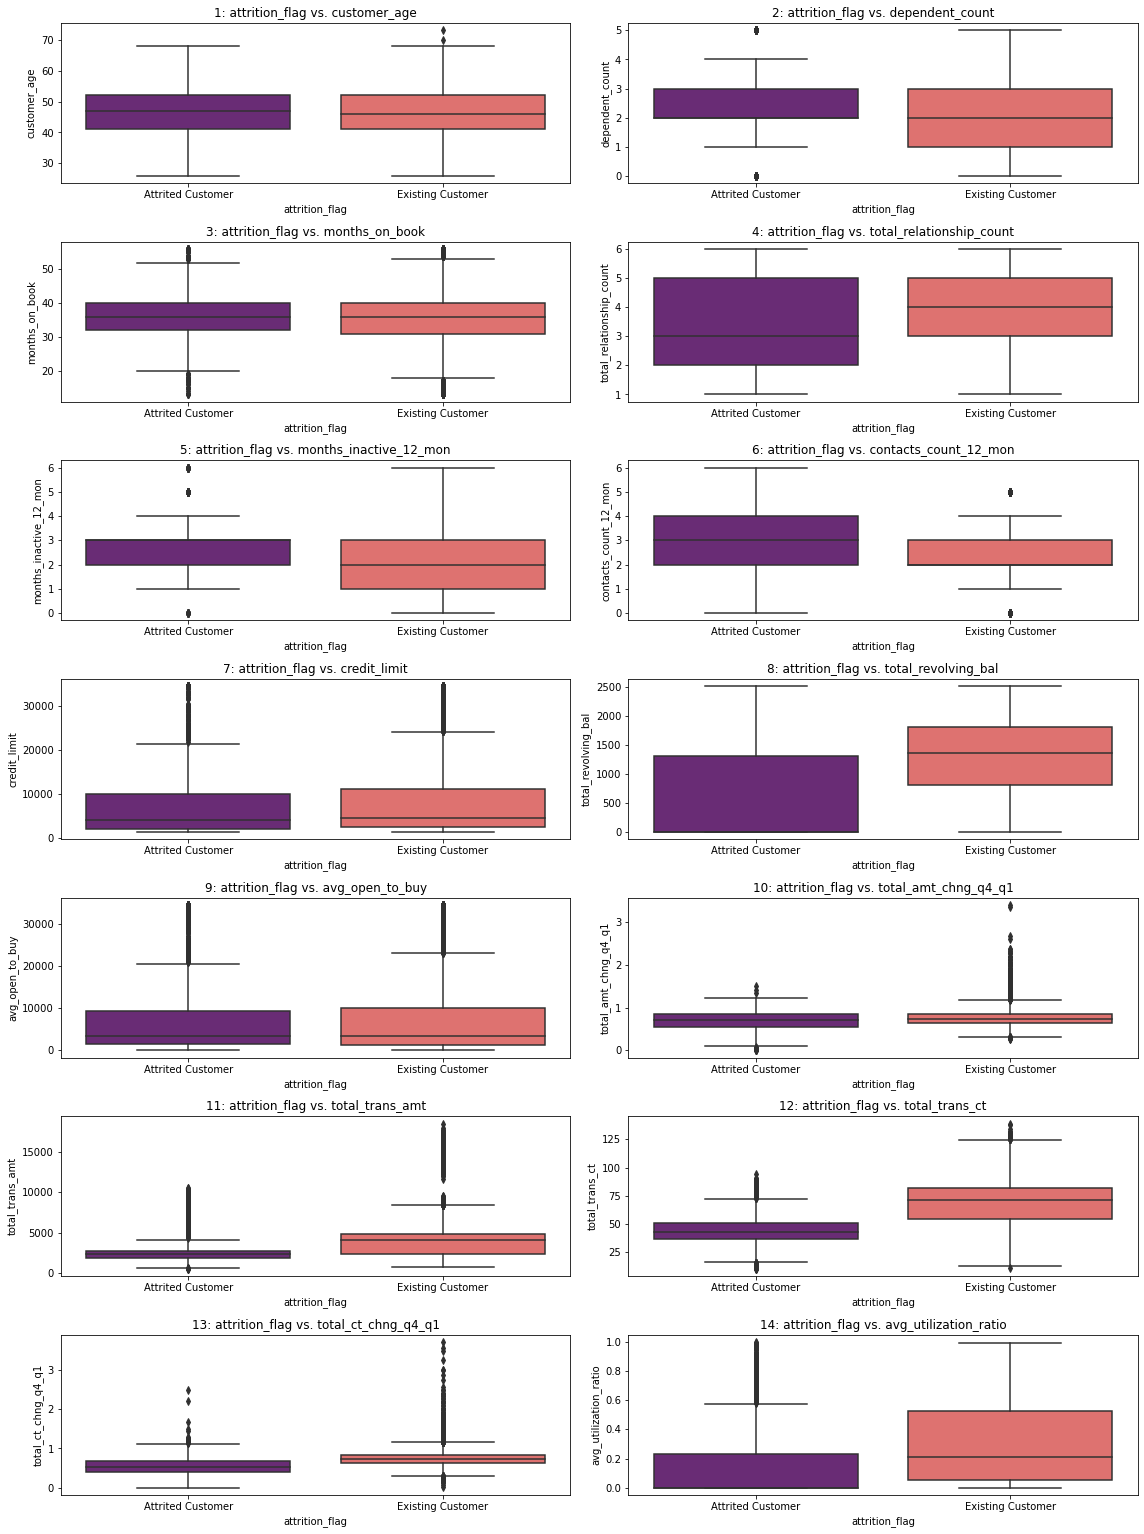

In [24]:
num_col = data.select_dtypes(exclude="category").columns.tolist()
target_variable = "attrition_flag"
box_plot(data, num_col, target_variable, True)

In [25]:
data[data["credit_limit"] > 23000]["income_category"].value_counts(normalize=True)

$80K - $120K     0.421
$120K +          0.302
$60K - $80K      0.156
Unknown          0.110
$40K - $60K      0.012
Less than $40K   0.000
Name: income_category, dtype: float64

### Percentage on bar chart for Categorical Features

In [26]:
# Below code plots grouped bar for each categorical feature

def perc_on_bar(data: pd.DataFrame, cat_columns, target, hue=None, perc=True):
    '''
    The function takes a category column as input and plots bar chart with percentages on top of each bar
    
    Usage:
    ------
    
    perc_on_bar(df, ['age'], 'prodtaken')
    '''
    
    subplot_cols = 2
    subplot_rows = int(len(cat_columns)/2 + 1)
    plt.figure(figsize=(16,3*subplot_rows))
    for i, col in enumerate(cat_columns):
        plt.subplot(subplot_rows,subplot_cols,i+1)
        order = data[col].value_counts(ascending=False).index  # Data order  
        ax=sns.countplot(data=data, x=col, palette = 'magma', order=order, hue=hue);
        for p in ax.patches:
            percentage = '{:.1f}%\n({})'.format(100 * p.get_height()/len(data[target]), p.get_height())
            # Added percentage and actual value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() + 40
            if perc:
                plt.annotate(percentage, (x, y), ha='center', color='black', fontsize='medium'); # Annotation on top of bars
            plt.xticks(color='black', fontsize='medium', rotation= (-90 if col=='region' else 0));
            plt.tight_layout()
            plt.title(col.capitalize() + ' Percentage Bar Charts\n\n')


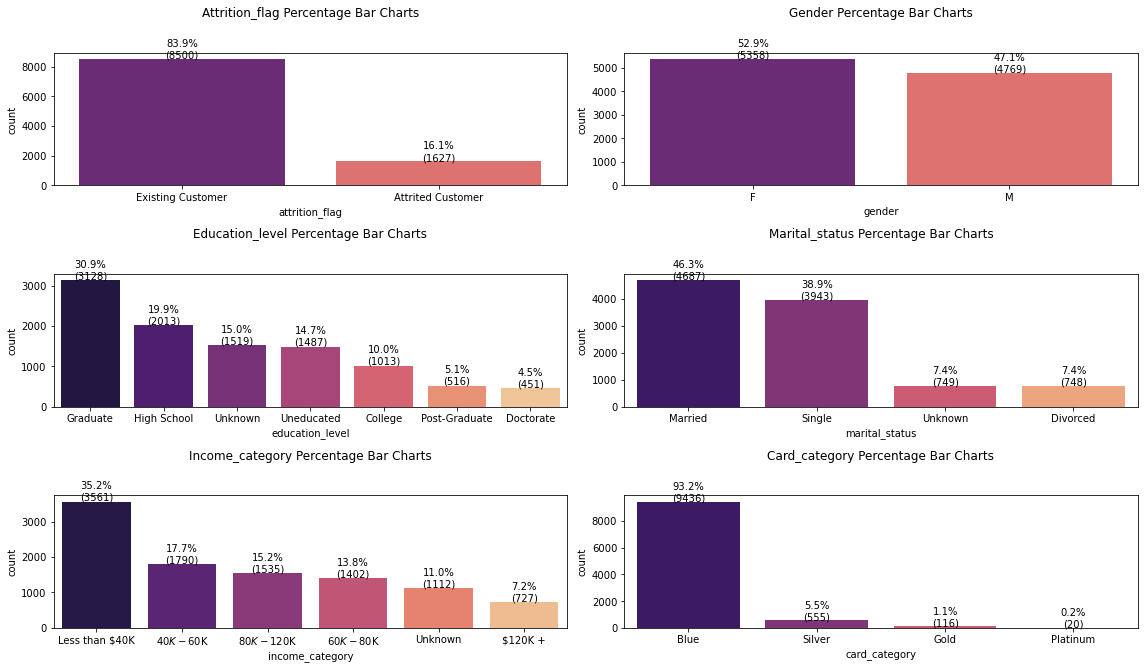

In [27]:
category_columns = data.select_dtypes(include="category").columns.tolist()
target_variable = "attrition_flag"
perc_on_bar(data, category_columns, target_variable)

- High Imbalance in data since the existing vs. attrited customers ratio is 84:16
- Data is almost equally distributed between `Males and Females`
- 31% customers are Graduate
- 85% customers are either Single or Married, where 46.7% of the customers are `Married`
- 35% customers earn less than 40k and 36% earns 60k or more
- 93% customers have Blue card

## Multi-variate Plots

### Pairplot of all available numeric columns, hued by Personal Loan

<Figure size 1440x1440 with 0 Axes>

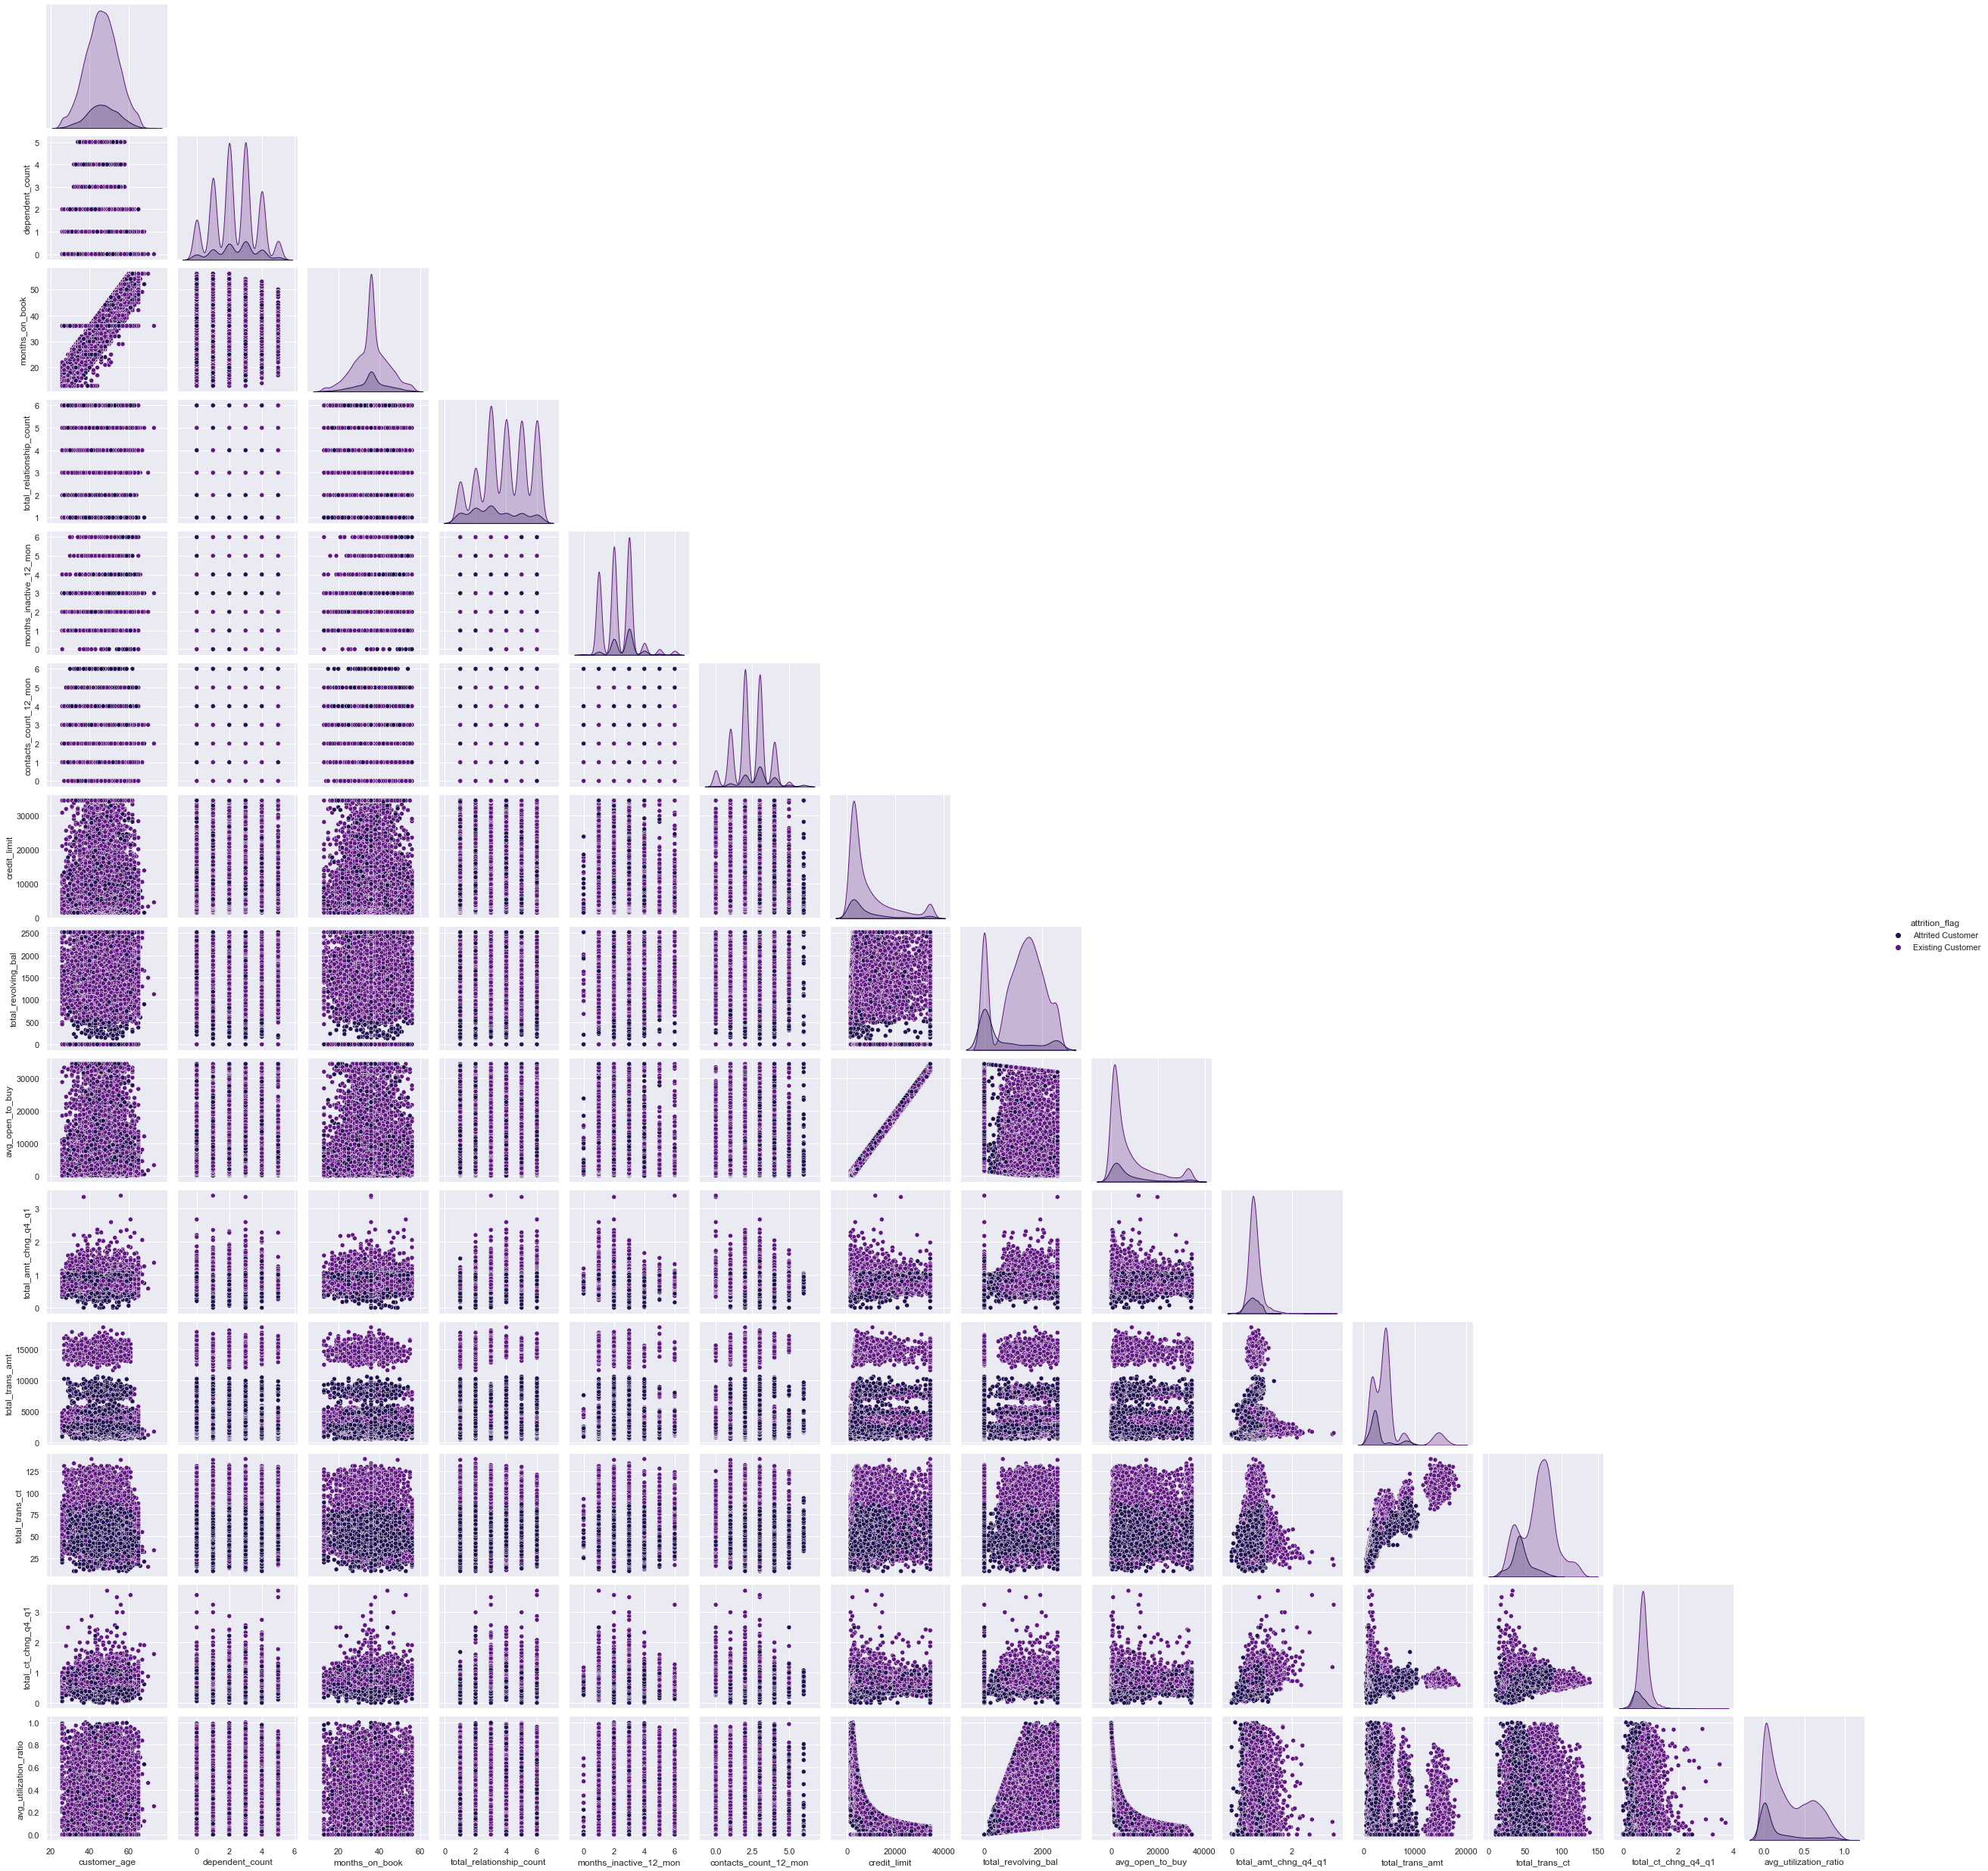

In [28]:
# Below plot shows correlations between the numerical features in the dataset

plt.figure(figsize=(20, 20))
sns.set(palette="magma")
sns.pairplot(data=data, hue="attrition_flag", corner=True)

- There are clusters formed with respect to attrition for the variables total revolving amount, total amount change Q4 to Q1, total transaction amount, total transaction count, total transaction count change Q4 to Q1

### Heatmap to understand correlations between independent and dependent variables

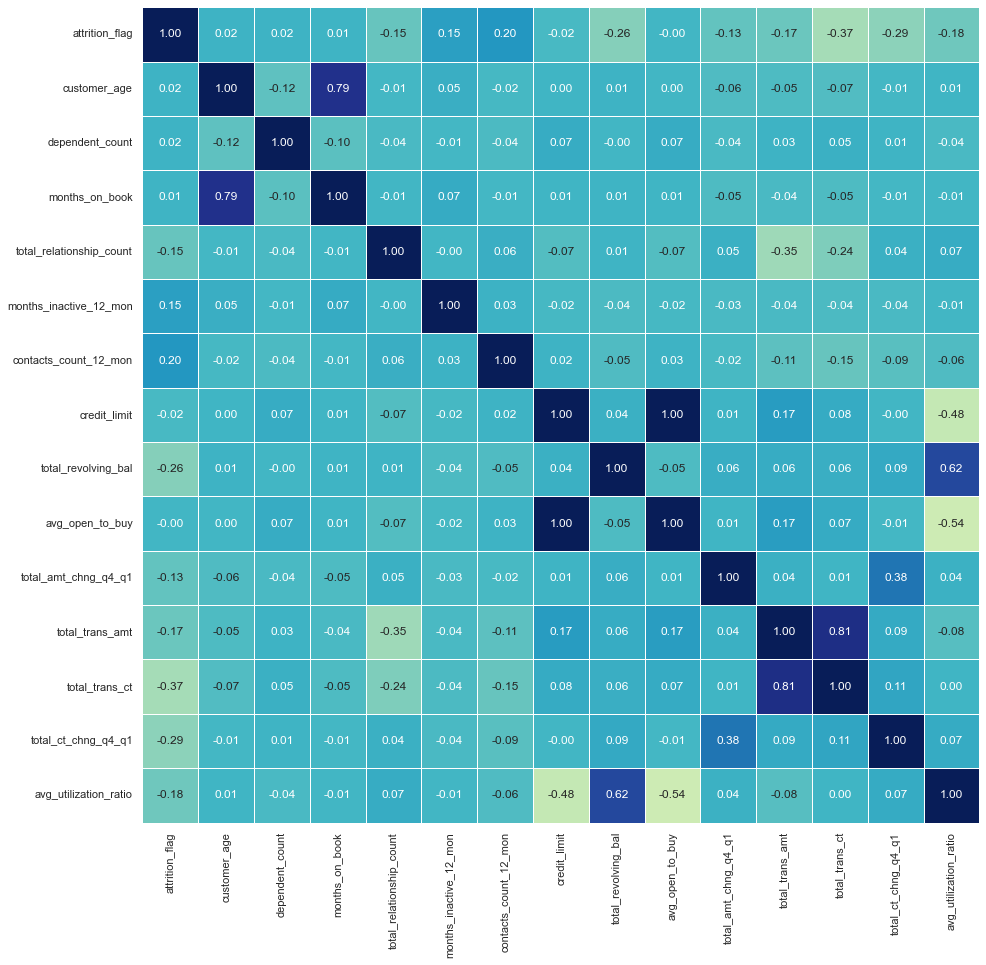

In [29]:
# Plotting correlation heatmap of the features
codes = {'Existing Customer':0, 'Attrited Customer':1}
data_clean = data.copy()
data_clean['attrition_flag'] = data_clean['attrition_flag'].map(codes).astype(int)


sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data_clean.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()


- Credit Limit and Average Open to Buy have 100% collinearity
- Months on book and Customer Age have quite strong correlation
- Average Utilization Ration and Total Revolving Balance are also a bit correlated it appears
- Attrition Flag does not have highly strong correlation with any of the numeric variables
- Customer Churn appears to be uncorrelated with Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit, we'll remove these from dataset

# Data Preprocessing

Pre-processing steps:

- Data Split into Dependent and Target sets
- Data Split to Train, Test and Validation sets
- Standardize feature names
- Drop unnecessary columns (Client Number, Customer Age, Dependent Count, Months on Book, Open to Buy, Credit Limit)
- Missing Value/Incorrect Value treatment
- Encoding
- Scaling/Outlier treatment

## Building data transformer functions and classes

In [30]:
# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


Firstly we'll work on building models individually after data pre-processing, and later we'll build an ML pipeline to run end to end process of pre-processing and model building. We are creating a data copy for the first part.

## Creating data copy

In [31]:
df = churn.copy()
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000


## Defining the static variables

In [32]:
# The static variables

# For dropping columns
columns_to_drop = [
    "clientnum",
    "credit_limit",
    "dependent_count",
    "months_on_book",
    "avg_open_to_buy",
    "customer_age",
]

# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}


## Data Type Conversions

**Here we are converting Object data type to Category**

In [33]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
df[cat_columns] = df[cat_columns].astype("category")

**Splitting the dataset into dependent and independent variable sets**

In [34]:
X = df.drop(columns=["Attrition_Flag"])
y = df["Attrition_Flag"].map(target_mapper)

## Split data in Train, Validation and Test sets

In [35]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 20) 

Validation Data Shape: 

 (2026, 20) 

Testing Data Shape: 

 (2026, 20)


**Checking the ratio of labels in the target column for each of the data segments**

In [36]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64


Validation: 
 0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64


Test: 
 0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


## Data processing

Data pre-processing is one of the the most important parts of the job before starting to train the model with the dataset. We need to impute missing values, fix any illogical data value in columns, convert category columns to numeric (either ordinal, or binary using one-hot encoding), scale the data to deal with the distribution skewness and outliers, before feeding the data to a model. 
&nbsp;

We are using the pre-available transformation classes and the custom classes that we created to first fit the training data and then transform the train, validation and test dataset. This is the standard logical practice to keep the influence of test and validation data in the train dataset to prevent/avoid data leakage while training or validating the model.

In [37]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

X_train = column_dropper.fit_transform(X_train)
X_val = column_dropper.transform(X_val)
X_test = column_dropper.transform(X_test)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

X_train = value_masker.fit_transform(X_train)
X_val = value_masker.transform(X_val)
X_test = value_masker.transform(X_test)

# To impute categorical Nulls to Unknown
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

# To encode the data
one_hot = PandasOneHot()

X_train = one_hot.fit_transform(X_train)
X_val = one_hot.transform(X_val)
X_test = one_hot.transform(X_test)


# Scale the numerical columns
robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

X_train[num_columns] = pd.DataFrame(
    robust_scaler.fit_transform(X_train[num_columns]),
    columns=num_columns,
    index=X_train.index,
)
X_val[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
)
X_test[num_columns] = pd.DataFrame(
    robust_scaler.transform(X_test[num_columns]),
    columns=num_columns,
    index=X_test.index,
)

In [38]:
X_train.head()

,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,marital_status_Unknown,income_category_$40K - $60K,income_category_$60K - $80K,income_category_$80K - $120K,income_category_Less than $40K,income_category_Unknown,card_category_Gold,card_category_Platinum,card_category_Silver
800,3.000,4.000,3.000,1.226,2.044,0.648,1.278,2.249,0.168,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
498,3.000,2.000,0.000,1.450,1.697,0.524,0.861,2.667,1.376,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4356,2.500,1.000,2.000,1.926,3.829,1.661,2.194,3.717,0.775,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
407,3.000,2.000,0.000,0.000,2.675,0.464,1.083,1.266,0.000,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
8728,1.000,2.000,3.000,1.037,3.307,2.971,2.333,3.165,0.188,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [39]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (6075, 27) 

Validation Data Shape: 

 (2026, 27) 

Testing Data Shape: 

 (2026, 27)


## Model evaluation criterion:

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer does not attrite - Loss of resources
2. Predicting a customer will not attrite and the customer attrites - Loss of opportunity for churning the customer

### Which case is more important? 
* Predicting that customer will not attrite, but actually attrites, would result in loss for the bank since if predicted correctly, marketing/sales team could have contacted the customer to retain them. This would result in losses. So, the false negatives should be minimized.

### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

## Model Evaluation Functions - Scoring & Confusion Matrix

We are creating a few functions to score the models, show the confusion matrix

### Function to Get Scores

# Building Models

We are building 8 models here, Logistic Regression, Bagging, Random Forest, Gradient Boosting, Ada Boosting, Extreme Gradient Boosting and Decision Tree.

## Build and Train Models

In [40]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.48090005232862
Random forest: 76.5353218210361
GBM: 81.0413396127682
Adaboost: 80.52904238618524
Xgboost: 83.9105180533752
dtree: 77.25170068027211

Validation Performance:

Bagging: 0.8220858895705522
Random forest: 0.8128834355828221
GBM: 0.8742331288343558
Adaboost: 0.8496932515337423
Xgboost: 0.8650306748466258
dtree: 0.8067484662576687


## Comparing Models

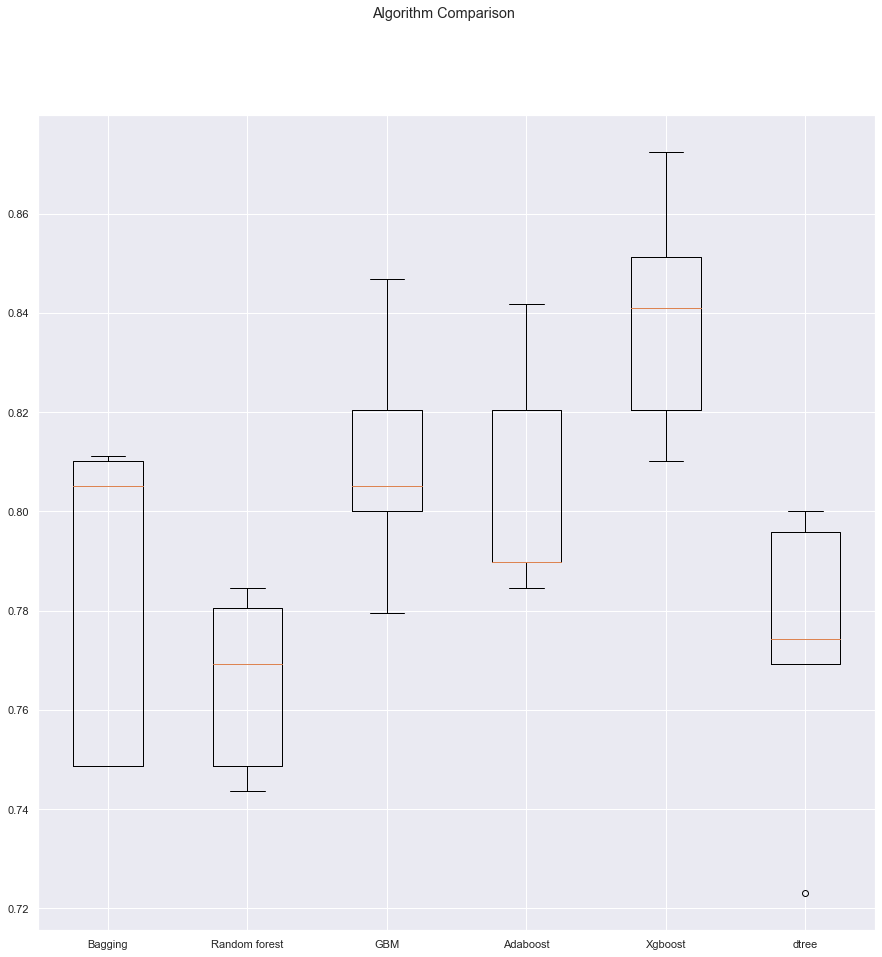

In [41]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [43]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Hyperparameter Tuning
- We will tune xgboost model using RandomizedSearchCV

### RandomizedSearchCV
- tuning xgboost model using RandomizedSearchCV

In [44]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9620617477760334:
Wall time: 1min


In [45]:
# building model with best parameters
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=10,
    gamma=3,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [46]:
# Calculating different metrics on train set
xgboost_random_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train, y_train
)
print("Training performance:")
xgboost_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.899,0.987,0.616,0.758


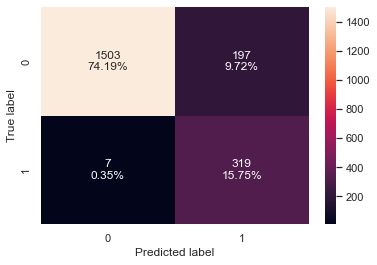

In [50]:
confusion_matrix_sklear(xgb_tuned2, X_val, y_val)

# Oversampling train data using SMOTE

In [51]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [52]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 976
Before OverSampling, count of label '0': 5099 

After OverSampling, count of label '1': 2549
After OverSampling, count of label '0': 5099 

After OverSampling, the shape of train_X: (7648, 27)
After OverSampling, the shape of train_y: (7648,) 



# Build Models with Oversampled Data

## Build and Train Models

We are building and training the same 6 models as before. We are however going to use the over-sampled training data for training the models.

In [53]:
models_over = []  # Empty list to store all the models

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_over.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_over.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_over.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_over:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 91.01637197118532
Random forest: 94.38976848106628
GBM: 92.07573481258908
Adaboost: 91.33009746138141
Xgboost: 95.4100697253361
dtree: 90.1144882314419

Validation Performance:

Bagging: 0.852760736196319
Random forest: 0.8619631901840491
GBM: 0.8957055214723927
Adaboost: 0.8957055214723927
Xgboost: 0.8895705521472392
dtree: 0.7914110429447853


## Comparing Models

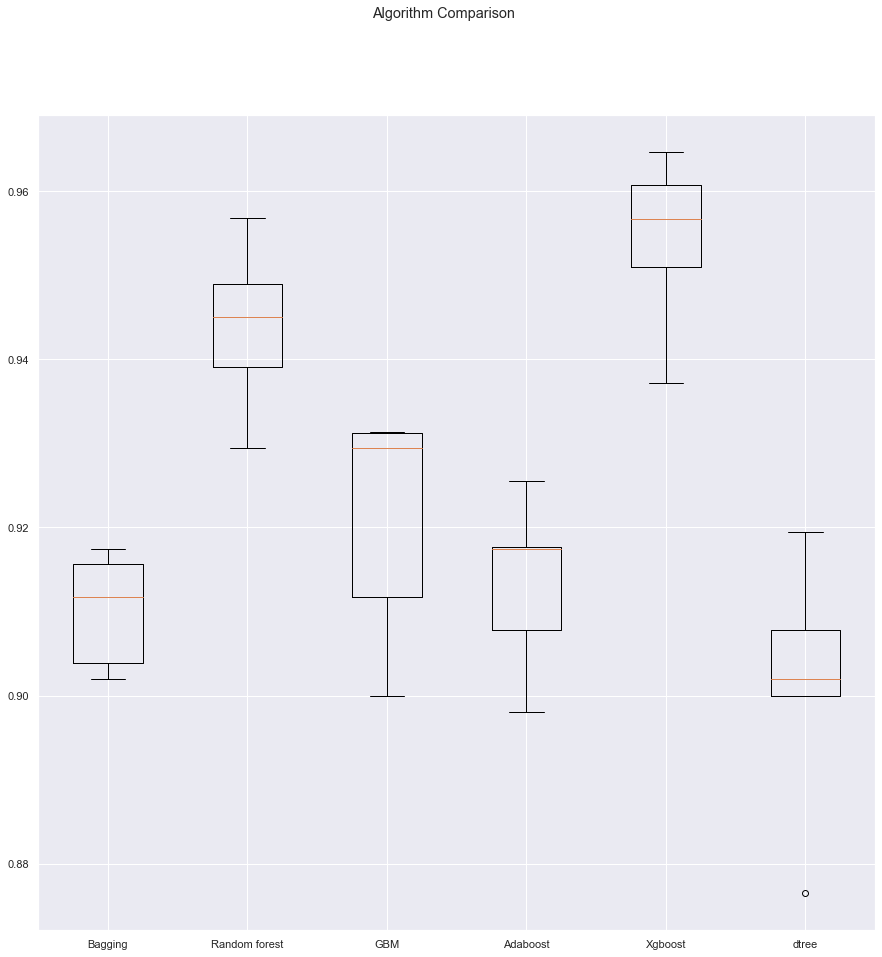

In [54]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning
- We will tune randomforest model using RandomizedSearchCV

In [55]:
model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=100,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 2, 'max_depth': None, 'criterion': 'entropy'} with CV score=0.7725170068027211:


In [56]:
# Creating new pipeline with best parameters
dtree_tuned2 = DecisionTreeClassifier(
    random_state=1, criterion="entropy", max_depth=None, min_samples_split=2
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [57]:
# Calculating different metrics on train set
dtree_random_train = model_performance_classification_sklearn(
    dtree_tuned2, X_train, y_train
)
print("Training performance:")
dtree_random_train

Training performance:


,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [58]:
# Calculating different metrics on validation set
dtree_random_val = model_performance_classification_sklearn(dtree_tuned2, X_val, y_val)
print("Validation performance:")
dtree_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.937,0.798,0.810,0.804


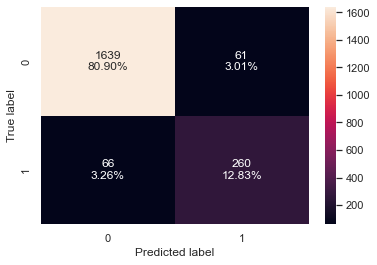

In [59]:
# creating confusion matrix
confusion_matrix_sklearn(dtree_tuned2, X_val, y_val)

# Undersampling train data using Random Under Sampler

Undersampling is another way of dealing with imbalance in the dataset.

Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset until a balanced dataset is created.

In [60]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [61]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 27)
After Under Sampling, the shape of train_y: (1952,) 



# Build Models with Undersampled Data

## Build and Train Models

We are again building the same models as before and training with the undersampled dataset, and use the validation dataset to score the models.

In [62]:
models_under = []  # Empty list to store all the models

# Appending models into the list
models_under.append(("Bagging", BaggingClassifier(random_state=1)))
models_under.append(("Random forest", RandomForestClassifier(random_state=1)))
models_under.append(("GBM", GradientBoostingClassifier(random_state=1)))
models_under.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models_under.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models_under.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_under:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 91.08634222919937
Random forest: 93.34275248560964
GBM: 94.77603349031921
Adaboost: 92.31711145996861
Xgboost: 94.16274201988489
dtree: 89.24123495552067

Validation Performance:

Bagging: 0.9325153374233128
Random forest: 0.9325153374233128
GBM: 0.9570552147239264
Adaboost: 0.9631901840490797
Xgboost: 0.9631901840490797
dtree: 0.8865030674846626


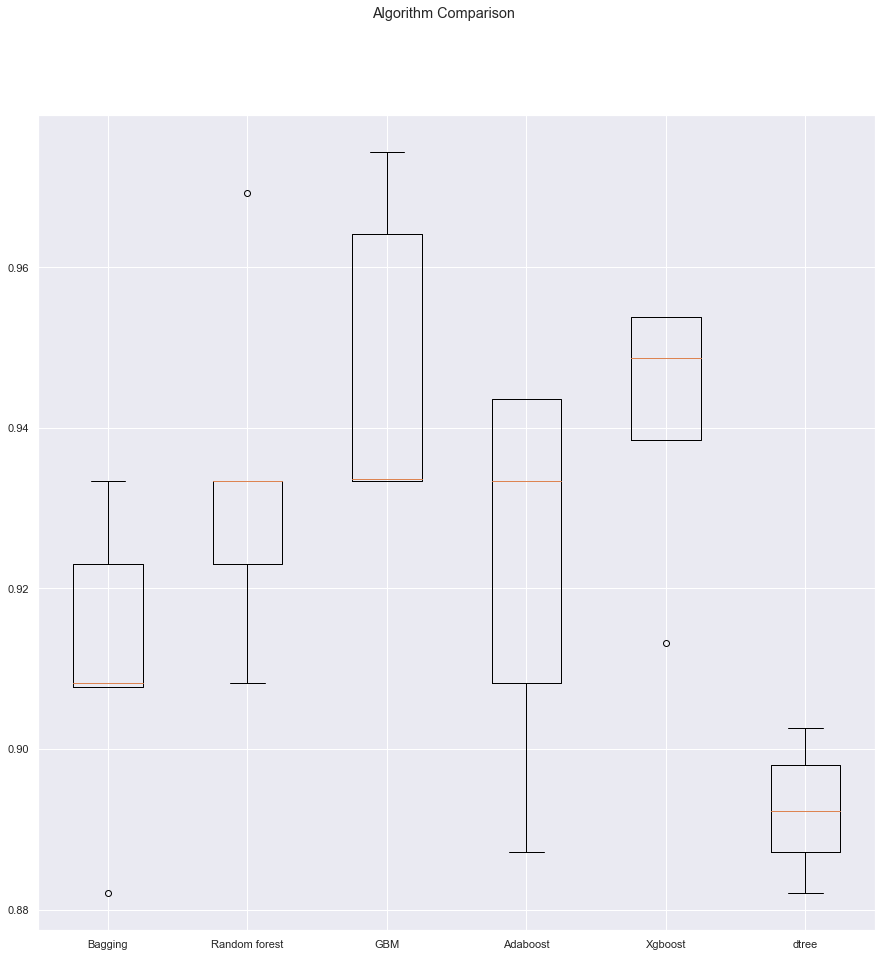

In [63]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [64]:
%%time 

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in GridSearchCV

param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8462794348508634:
Wall time: 1min 56s


In [65]:
# building model with best parameters
adb_tuned2 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1,
    random_state=1,
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)

# Fit the model on training data
adb_tuned2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=100, random_state=1)

**Checking model performance**

Training performance:
   Accuracy  Recall  Precision    F1
0     0.991   0.968      0.974 0.971
*************************************


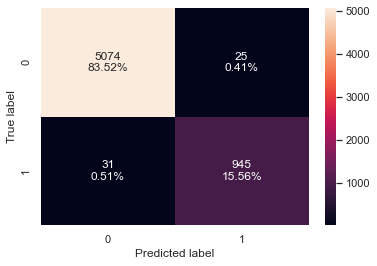

In [66]:
# Calculating different metrics on train set
Adaboost_random_train = model_performance_classification_sklearn(
    adb_tuned2, X_train, y_train
)
print("Training performance:")
print(Adaboost_random_train)


print("*************************************")

# creating confusion matrix
confusion_matrix_sklearn(adb_tuned2, X_train, y_train)

## Comparing Models

In [67]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        Adaboost_random_train.T,
        xgboost_random_train.T,
        dtree_random_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost Tuned with Random search",
    "Xgboost Tuned with Random Search",
    "dtree Tuned with Rndom search"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Tuned with Random search,Xgboost Tuned with Random Search,dtree Tuned with Rndom search
Accuracy,0.991,0.899,1.000
Recall,0.968,0.987,1.000
Precision,0.974,0.616,1.000
F1,0.971,0.758,1.000


## Choice of models for tuning

####  Observations 
- Comparing CV scores and the training score, xgboost model tuned using Random search is giving the better results. Since, dtree  model is overfitting, and adaboost is not overfitting, but generalizing the model well, but not as good as XGB, we'll go ahead with XGB.
- Let's check the model's performance on test set and then see the feature importance from the tuned xgboost model

###  Performance on the test set

In [68]:
# Calculating different metrics on the test set
xgboost_grid_test = model_performance_classification_sklearn(xgb_tuned2, X_test, y_test)
print("Test performance:")
xgboost_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.895,0.982,0.608,0.751


# Check Test Data on XGB Tuned 

## Feature Importance

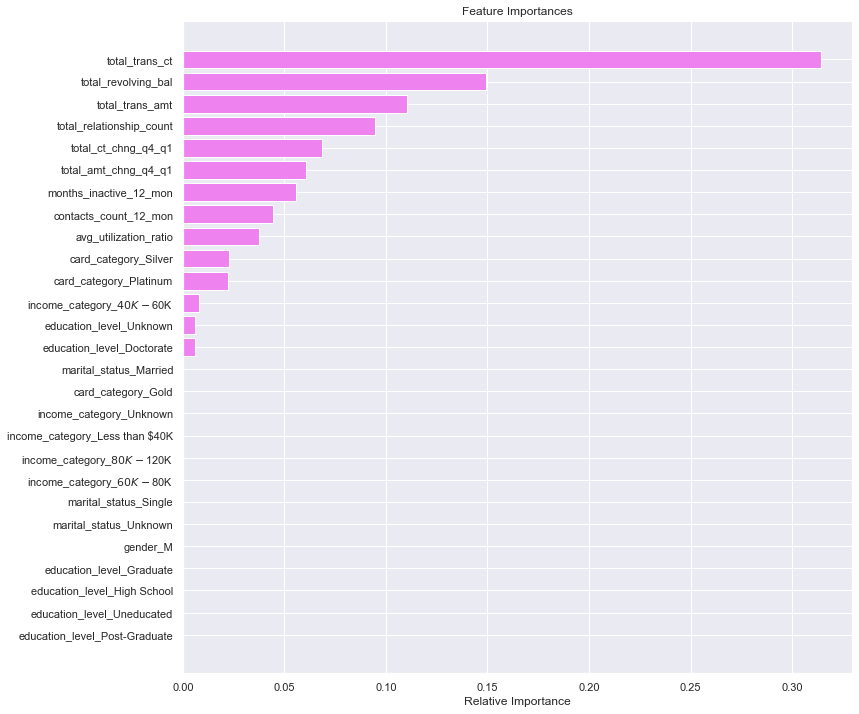

In [69]:
feature_names = X_train.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Actionable Insights & Recommendations
#### Business recommendations and insights

- The most important features to understand customer credit card churn, are
 a. Total Transaction Count
 b. Total Transaction Amount
 c. Total Revolving Balance
 d. Total Amount Change Q4 to Q1
 d. Total Count Change Q4 to Q1
 f. Total Relationship Count  

- The features mentioned here exhibit a negative correlation with the Attrition Flag, which means that as the values of these features decrease, the likelihood of a customer churning increases. 

- To strengthen the customer's relationship with the bank, it's recommended that the bank maintains more frequent communication with the customer and presents them with a variety of offers and schemes.  

- Providing cashback schemes on credit cards is a strategy that the bank could implement to incentivize customers to use their credit card more frequently.  

- In order to boost credit card spends and transaction amounts, the bank ought to provide credit limit increases to customers who frequently use their credit card.  

- One offer that can be given to customers to encourage them to use their credit card for higher cost purchases is 0% interest EMI. This allows them to convert their expenditure to EMI and increase both the total transaction amount and transaction counts. Additionally, it can help the balance to revolve smoothly.  

- Along with the available types of cards, bank can introduce credit cards specific to online shopping (with % cashback offers) or online food ordering. This way the card will be used more frequently.  

- With our model, we can predict which customers are likely to attrite, and according to the predicted probability, at least top 20-30% customers can be reached out to discuss credit card offers, credit limit increase etc, to try retain those customers.

###  Pipelines for productionizing the model 

- Pipeline is a means of automating the machine learning workflow by enabling data to be transformed and correlated into a model that can then be analyzed to achieve outputs. This type of ML pipeline makes the process of inputting data into the ML model fully automated. 

- Now, we have a final model. let's use pipelines to put the model into production

In [73]:
# The static variables
# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
target_mapper = {"Attrited Customer": 1, "Existing Customer": 0}

df1 = churn.copy()
cat_columns = df1.select_dtypes(include="object").columns.tolist()
df1[cat_columns] = df1[cat_columns].astype("category")

In [74]:
X = df1.drop(columns=["Attrition_Flag"])
y = df1["Attrition_Flag"].map(target_mapper)

In [75]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


In [76]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
0   0.839
1   0.161
Name: Attrition_Flag, dtype: float64
0   0.840
1   0.160
Name: Attrition_Flag, dtype: float64


In [81]:
# For masking a particular value in a feature
column_to_mask_value = "income_category"
value_to_mask = "abc"
masked_value = "Unknown"

# One-hot encoding columns
columns_to_encode = [
    "gender",
    "education_level",
    "marital_status",
    "income_category",
    "card_category",
]

# Numerical Columns
num_columns = [
    "total_relationship_count",
    "months_inactive_12_mon",
    "contacts_count_12_mon",
    "total_revolving_bal",
    "total_amt_chng_q4_q1",
    "total_trans_amt",
    "total_trans_ct",
    "total_ct_chng_q4_q1",
    "avg_utilization_ratio",
]

# Columns for null imputation with Unknown
columns_to_null_imp_unknown = ["education_level", "marital_status"]

## Build the pipeline

In [82]:
# To Standardize feature names
feature_name_standardizer = FeatureNamesStandardizer()

# To Drop unnecessary columns
column_dropper = ColumnDropper(features=columns_to_drop)

# To Mask incorrect/meaningless value of a feature
value_masker = CustomValueMasker(
    feature=column_to_mask_value, value_to_mask=value_to_mask, masked_value=masked_value
)

# Missing value imputation
imputer = FillUnknown()

# To encode the categorical data
one_hot = OneHotEncoder(handle_unknown="ignore")

# To scale numerical columns
scaler = RobustScaler()


# creating a transformer for feature name standardization and dropping columns
cleanser = Pipeline(
    steps=[
        ("feature_name_standardizer", feature_name_standardizer),
        ("column_dropper", column_dropper),
        ("value_mask", value_masker),
        ("imputation", imputer),
    ]
)

# creating a transformer for data encoding

encode_transformer = Pipeline(steps=[("onehot", one_hot)])
num_scaler = Pipeline(steps=[("scale", scaler)])

preprocessor = ColumnTransformer(
    transformers=[
        ("encoding", encode_transformer, columns_to_encode),
        ("scaling", num_scaler, num_columns),
    ],
    remainder="passthrough",
)

# Model

xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=10,
    gamma=3,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=5,
)

# Creating new pipeline with best parameters
model_pipe = Pipeline(
    steps=[
        ("cleanse", cleanser),
        ("preprocess", preprocessor),
        ("model", xgb_tuned2),
    ]
)
# Fit the model on training data
model_pipe.fit(X_train_un, y_train_un)

KeyError: "['clientnum' 'credit_limit' 'dependent_count' 'months_on_book'\n 'avg_open_to_buy' 'customer_age'] not found in axis"

In [ ]:
xgb_tuned2 = XGBClassifier(
    random_state=1,
    n_estimators=100,
    scale_pos_weight=10,
    gamma=3,
    subsample=0.8,
    learning_rate=0.05,
    eval_metric="logloss",
    max_depth=3,
    reg_lambda=5,
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)